In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from numpy import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from math import radians, cos, sin, asin, sqrt
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

df1 = pd.read_csv("resale-flat-prices-based-on-approval-date-1990-1999.csv")
df2 = pd.read_csv("resale-flat-prices-based-on-approval-date-2000-feb-2012.csv")
df3 = pd.read_csv("resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv")
df4 = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv")
df5 = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")
df = pd.concat([df1,df2,df3,df4,df5])
print(len(df))
df
#we can see that all columns apart for remaining_lease contain no null values

841205


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
94993,2021-04,YISHUN,5 ROOM,505D,YISHUN ST 51,07 TO 09,112.0,Improved,2016,545000.0,94 years
94994,2021-04,YISHUN,5 ROOM,504D,YISHUN ST 51,10 TO 12,113.0,Improved,2016,600000.0,94 years
94995,2021-04,YISHUN,EXECUTIVE,326,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,650000.0,66 years 04 months
94996,2021-04,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,645000.0,66 years 04 months


## Filtering for Jurong data

In [ ]:
df["street_name"].unique()
#get all rows that are in jurong for simplicity sake
df = df[df['street_name'].str.contains('JURONG')]

In [ ]:
#mrt to try: jurong east, boon lay, chinese garden, pioneer, lakeside
#clinic to try: 24 hour, family, clinic, polyclinic, doctor
d = {'street_name': ['JURONG WEST ST 75', 'JURONG WEST CTRL 1', 'JURONG WEST ST 61', 'JURONG WEST ST 65', 'JURONG WEST ST 64','JURONG WEST ST 51', 
     'JURONG WEST ST 72', 'JURONG WEST ST 71', 'JURONG WEST AVE 5', 'JURONG WEST ST 74', 'JURONG EAST AVE 1', 'JURONG EAST ST 32', 'JURONG EAST ST 13', 
     'JURONG EAST ST 21', 'JURONG EAST ST 24', 'JURONG WEST ST 62', 'JURONG WEST AVE 3', 'JURONG WEST ST 25', 'JURONG WEST ST 24', 'JURONG WEST ST 91', 
     'JURONG WEST ST 81', 'JURONG WEST ST 73', 'JURONG WEST ST 92', 'JURONG WEST ST 93', 'JURONG EAST ST 31', 'JURONG WEST ST 52', 'JURONG WEST ST 41', 
     'JURONG WEST AVE 1', 'JURONG WEST ST 42'], 
       
     'Latitude':[1.34806, 1.34261, 1.33859, 1.34, 1.34107,1.3463505,1.3455229, 1.341727, 1.3465555, 1.3502442, 1.3441563745059006, 
     1.3471930129471474, 1.337247917311076, 1.3370328568505785, 1.3435491326459676, 1.340456, 1.351927, 1.354031, 1.350165,1.3400, 1.3479, 1.3464, 1.33955, 
     1.340776,1.34720, 1.34847, 1.34855, 1.35122, 1.35342], 
     
     'Longitude':[103.69989, 103.70544, 103.69849, 103.70104, 103.70393, 103.7214376, 103.6993971, 103.6963061, 103.6968668, 103.6993469, 
     103.73486373444183, 103.73383493884167, 103.7373158541849, 103.74333178751651, 103.7401192713474,103.700979, 103.704671, 103.703850, 
     103.70688,103.7041, 103.6947, 103.7000, 103.68979, 103.690171, 103.73055, 103.71783, 103.72327, 103.72095, 103.72172],
     
     'mrt_station':[0,1,1,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0], 
     
     'bus_stop' : [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1], 
     
     'hawker_centre':[1,1,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,0,1,1,0,1,1],
     
     'clinic':[1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1]}
loc = pd.DataFrame(data = d)

df = df.merge(loc, left_on = 'street_name', right_on = 'street_name')
loc

,street_name,Latitude,Longitude,mrt_station,bus_stop,hawker_centre,clinic
0,JURONG WEST ST 75,1.348060,103.699890,0,1,1,1
1,JURONG WEST CTRL 1,1.342610,103.705440,1,1,1,1
2,JURONG WEST ST 61,1.338590,103.698490,1,1,1,1
3,JURONG WEST ST 65,1.340000,103.701040,1,1,1,1
4,JURONG WEST ST 64,1.341070,103.703930,1,1,1,1
5,JURONG WEST ST 51,1.346351,103.721438,1,1,1,1
6,JURONG WEST ST 72,1.345523,103.699397,0,1,0,1
7,JURONG WEST ST 71,1.341727,103.696306,1,1,1,1
8,JURONG WEST AVE 5,1.346556,103.696867,0,1,1,1
9,JURONG WEST ST 74,1.350244,103.699347,0,1,0,1


## Preprocessing dataset

In [ ]:
#suppose we drop the remaining_lease column since we already have the lease
#commencement_date, which is directly linked to the remaining_lease.
#remaining_lease is calculated by taking 99 years - (year in the month column 
# - lease_commence_date)
df = df.drop(['remaining_lease'], axis = 1)

# Assume: block information is not useful
df = df.drop(['block'], axis = 1)
df

,month,town,flat_type,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Latitude,Longitude,mrt_station,bus_stop,hawker_centre,clinic
0,1990-01,JURONG EAST,3 ROOM,JURONG EAST AVE 1,10 TO 12,74.0,MODEL A,1983,57000.0,1.344156,103.734864,1,1,1,1
1,1990-01,JURONG EAST,5 ROOM,JURONG EAST AVE 1,10 TO 12,142.0,MODEL A,1985,155000.0,1.344156,103.734864,1,1,1,1
2,1990-01,JURONG EAST,5 ROOM,JURONG EAST AVE 1,13 TO 15,131.0,MODEL A,1985,130000.0,1.344156,103.734864,1,1,1,1
3,1990-01,JURONG EAST,EXECUTIVE,JURONG EAST AVE 1,07 TO 09,149.0,MAISONETTE,1985,160000.0,1.344156,103.734864,1,1,1,1
4,1990-01,JURONG EAST,EXECUTIVE,JURONG EAST AVE 1,04 TO 06,157.0,MAISONETTE,1985,182000.0,1.344156,103.734864,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61646,2021-01,JURONG WEST,5 ROOM,JURONG WEST ST 24,01 TO 03,112.0,Premium Apartment,2003,400000.0,1.350165,103.706880,0,1,0,1
61647,2021-01,JURONG WEST,5 ROOM,JURONG WEST ST 24,10 TO 12,112.0,Premium Apartment,2003,418000.0,1.350165,103.706880,0,1,0,1
61648,2021-02,JURONG WEST,4 ROOM,JURONG WEST ST 24,07 TO 09,94.0,Premium Apartment,2003,372000.0,1.350165,103.706880,0,1,0,1
61649,2021-03,JURONG WEST,4 ROOM,JURONG WEST ST 24,16 TO 18,95.0,Premium Apartment,2003,378000.0,1.350165,103.706880,0,1,0,1


In [ ]:
#I want to group the storeys into different groups. For example, the grouping will be conducted based on the starting and 
#ending number of the storey_range. Eg storey_range may be "10 to 12", I'll take 11 and then group based on that number.
df = df.assign(storey_simplified = lambda x:x['storey_range'].map(lambda storey:int(int(storey[0:2]) + int(storey[6:8]))/2))
df = df.drop(['storey_range'],axis = 1)
df

,month,town,flat_type,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,Latitude,Longitude,mrt_station,bus_stop,hawker_centre,clinic,storey_simplified
0,1990-01,JURONG EAST,3 ROOM,JURONG EAST AVE 1,74.0,MODEL A,1983,57000.0,1.344156,103.734864,1,1,1,1,11.0
1,1990-01,JURONG EAST,5 ROOM,JURONG EAST AVE 1,142.0,MODEL A,1985,155000.0,1.344156,103.734864,1,1,1,1,11.0
2,1990-01,JURONG EAST,5 ROOM,JURONG EAST AVE 1,131.0,MODEL A,1985,130000.0,1.344156,103.734864,1,1,1,1,14.0
3,1990-01,JURONG EAST,EXECUTIVE,JURONG EAST AVE 1,149.0,MAISONETTE,1985,160000.0,1.344156,103.734864,1,1,1,1,8.0
4,1990-01,JURONG EAST,EXECUTIVE,JURONG EAST AVE 1,157.0,MAISONETTE,1985,182000.0,1.344156,103.734864,1,1,1,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61646,2021-01,JURONG WEST,5 ROOM,JURONG WEST ST 24,112.0,Premium Apartment,2003,400000.0,1.350165,103.706880,0,1,0,1,2.0
61647,2021-01,JURONG WEST,5 ROOM,JURONG WEST ST 24,112.0,Premium Apartment,2003,418000.0,1.350165,103.706880,0,1,0,1,11.0
61648,2021-02,JURONG WEST,4 ROOM,JURONG WEST ST 24,94.0,Premium Apartment,2003,372000.0,1.350165,103.706880,0,1,0,1,8.0
61649,2021-03,JURONG WEST,4 ROOM,JURONG WEST ST 24,95.0,Premium Apartment,2003,378000.0,1.350165,103.706880,0,1,0,1,17.0


In [ ]:
# Converting month to integer labels

def month_to_label(month):
    x = month.split('-')
    return (int(x[0])-1990)*12 + int(x[1])

def label_to_month(label):
    return "{:d}-{:02d}".format(int(label/12+1990), int(label%12))

# Labelling "month" column
df = df.assign(month = lambda x:x['month'].map(lambda month: month_to_label(month)))
df

,month,town,flat_type,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,Latitude,Longitude,mrt_station,bus_stop,hawker_centre,clinic,storey_simplified
0,1,JURONG EAST,3 ROOM,JURONG EAST AVE 1,74.0,MODEL A,1983,57000.0,1.344156,103.734864,1,1,1,1,11.0
1,1,JURONG EAST,5 ROOM,JURONG EAST AVE 1,142.0,MODEL A,1985,155000.0,1.344156,103.734864,1,1,1,1,11.0
2,1,JURONG EAST,5 ROOM,JURONG EAST AVE 1,131.0,MODEL A,1985,130000.0,1.344156,103.734864,1,1,1,1,14.0
3,1,JURONG EAST,EXECUTIVE,JURONG EAST AVE 1,149.0,MAISONETTE,1985,160000.0,1.344156,103.734864,1,1,1,1,8.0
4,1,JURONG EAST,EXECUTIVE,JURONG EAST AVE 1,157.0,MAISONETTE,1985,182000.0,1.344156,103.734864,1,1,1,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61646,373,JURONG WEST,5 ROOM,JURONG WEST ST 24,112.0,Premium Apartment,2003,400000.0,1.350165,103.706880,0,1,0,1,2.0
61647,373,JURONG WEST,5 ROOM,JURONG WEST ST 24,112.0,Premium Apartment,2003,418000.0,1.350165,103.706880,0,1,0,1,11.0
61648,374,JURONG WEST,4 ROOM,JURONG WEST ST 24,94.0,Premium Apartment,2003,372000.0,1.350165,103.706880,0,1,0,1,8.0
61649,375,JURONG WEST,4 ROOM,JURONG WEST ST 24,95.0,Premium Apartment,2003,378000.0,1.350165,103.706880,0,1,0,1,17.0


### Option A: Handling categorical data using one-hot encoding

In [ ]:
# One Hot Encoding to be used for regression-based models

onehot = OneHotEncoder()
town_df = pd.DataFrame(onehot.fit_transform(df[['town']]).toarray())
town_df.columns = onehot.get_feature_names(['town'])
flat_model_df = pd.DataFrame(onehot.fit_transform(df[['flat_model']]).toarray())
flat_model_df.columns = onehot.get_feature_names(['flat_model'])
flat_type_df = pd.DataFrame(onehot.fit_transform(df[['flat_type']]).toarray())
flat_type_df.columns = onehot.get_feature_names(['flat_type'])
street_name_df = pd.DataFrame(onehot.fit_transform(df[['street_name']]).toarray())
street_name_df.columns = onehot.get_feature_names(['street_name'])

df = df.join([town_df, flat_model_df, flat_type_df, street_name_df])
df = df.drop(['town','flat_type','flat_model','street_name'], axis = 1)
df

,month,floor_area_sqm,lease_commence_date,resale_price,Latitude,Longitude,mrt_station,bus_stop,hawker_centre,clinic,...,street_name_JURONG WEST ST 65,street_name_JURONG WEST ST 71,street_name_JURONG WEST ST 72,street_name_JURONG WEST ST 73,street_name_JURONG WEST ST 74,street_name_JURONG WEST ST 75,street_name_JURONG WEST ST 81,street_name_JURONG WEST ST 91,street_name_JURONG WEST ST 92,street_name_JURONG WEST ST 93
0,1,74.0,1983,57000.0,1.344156,103.734864,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,142.0,1985,155000.0,1.344156,103.734864,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,131.0,1985,130000.0,1.344156,103.734864,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,149.0,1985,160000.0,1.344156,103.734864,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,157.0,1985,182000.0,1.344156,103.734864,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61646,373,112.0,2003,400000.0,1.350165,103.706880,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61647,373,112.0,2003,418000.0,1.350165,103.706880,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61648,374,94.0,2003,372000.0,1.350165,103.706880,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61649,375,95.0,2003,378000.0,1.350165,103.706880,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#get the correlation heatmap between the different variables (excluding the target concept - resale price)
df.assign(floor_area_sqm = lambda x:x['floor_area_sqm'].map(lambda sqm:int(sqm)))
df.assign(lease_commence_date = lambda x:x['lease_commence_date'].map(lambda date:int(date)))
df.assign(resale_price = lambda x:x['resale_price'].map(lambda price:int(price)))
df.assign(storey_simplified = lambda x:x['storey_simplified'].map(lambda storey:int(storey)))
convert_dict = {"floor_area_sqm" : int}
df = df.astype(convert_dict)

# response = df['resale_price'] 
# df = df.drop(['resale_price'],axis=1)
# corr = df.corr()
# sns.heatmap(corr)

## Performing price prediction

In [ ]:
# Split train-validation set
# Training set: 1990-2015
# Validation set: 2016-2021

train, test = [rows for _, rows in df.groupby(df['month'] > month_to_label("2015-12"))]
y_train = train['resale_price'].tolist()
y_test = test['resale_price'].tolist()

train = train.drop(['resale_price'],axis=1)
test = test.drop(['resale_price'],axis=1)
X_train = train.to_numpy()
X_test = test.to_numpy()

# The line below is no longer used
# X_train,X_test,y_train,y_test = train_test_split(df,response,test_size = 0.20,random_state=1)

In [ ]:
# Using SVR (linear kernel) -- uses Option A: One-Hot Encoding
svr = SVR(kernel='linear', C=1)
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
score = sqrt(mean_squared_error(y_test, y_pred))
print(score)

73336.9737022403


In [ ]:
# Using SVR (rbf kernel) -- uses Option A: One-Hot Encoding
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
score = sqrt(mean_squared_error(y_test, y_pred))
print(score)

NameError: name 'X_train' is not defined

In [ ]:
# Using SVR (polynomial kernel) -- uses Option A: One-Hot Encoding
svr = SVR(kernel='poly')
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
score = sqrt(mean_squared_error(y_test, y_pred))
print(score)

184711.53136711815


In [ ]:
# Using SVR (sigmoid kernel) -- uses Option A: One-Hot Encoding
svr = SVR(kernel='sigmoid')
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
score = sqrt(mean_squared_error(y_test, y_pred))
print(score)

184864.36415835388


In [ ]:
# Using Random Forest -- uses Option ???
regressor = RandomForestRegressor(n_estimators = 110, max_depth = 14, random_state = 0)
regressor = regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
score = sqrt(mean_squared_error(y_test, y_pred))
print(score)

35255.6755104578


In [ ]:
# Using NN (3 layers, activation relu) -- uses Option A: One-Hot Encoding
# i tried setting seed but it still gives a different model

import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from math import sqrt

from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))
    
def build_and_compile_model(norm):
  model = Sequential([
      norm,
      Dense(64, activation='relu'),
      Dropout(0.2),
      Dense(64, activation='relu'),
      Dropout(0.2),
      Dense(1, activation = 'relu')
  ])

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])
  return model
model = build_and_compile_model(normalizer)
print(model.summary())

for epoch in range(50,500,50):
  hist = model.fit(
      X_train, np.array(y_train),
      validation_split=0.2,
      epochs=epoch)
  pred = model.predict(X_test)
  score = sqrt(mean_squared_error(y_test, pred))
  print((epoch,score))


def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

#plot_loss(hist)

#pred = model.predict(X_test)
#score = mean_squared_error(y_test, pred)
#print(score)


NameError: name 'preprocessing' is not defined

In [ ]:
# Using NN (3 layers, activation none) -- uses Option A: One-Hot Encoding

import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))
    
def build_and_compile_model(norm):
  model = Sequential([
      norm,
      Dense(64, activation='relu'),
      Dense(64, activation='relu'),
      Dense(1)
  ])

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])
  return model
model = build_and_compile_model(normalizer)
print(model.summary())

for epoch in range(50,500,50):
  hist = model.fit(
      X_train, np.array(y_train),
      validation_split=0.2,
      verbose=0, epochs=epoch)
  pred = model.predict(X_test)
  score = mean_squared_error(y_test, pred)
  print((epoch,score))


def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

#plot_loss(hist)

#pred = model.predict(X_test)
#score = mean_squared_error(y_test, pred)
#print(score)

In [ ]:
# Using NN (5 layers, activation none) -- uses Option A: One-Hot Encoding

import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from math import sqrt

from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))
    
def build_and_compile_model(norm):
  model = Sequential([
      norm,
      Dense(50, activation= 'relu'),
      Dense(50, activation= 'relu'),
      Dense(50, activation= 'relu'),
      Dense(50, activation= 'relu'),
      Dense(1)
  ])

  model.compile(loss='mse',
                optimizer='adam')
  return model
model = build_and_compile_model(normalizer)
set_seed(2)
model.fit(X_train, np.array(y_train),
      validation_split=0.2,
      epochs=600, batch_size = 32)

pred = model.predict(X_test)
score = mean_squared_error(y_test, pred)
print(sqrt(score))


Epoch 102/600
1346/1346 [==============================] - 3s 2ms/step - loss: 346446047.2160 - val_loss: 24087250944.0000
Epoch 103/600
1346/1346 [==============================] - 3s 2ms/step - loss: 343326930.0074 - val_loss: 23799433216.0000
Epoch 104/600
1346/1346 [==============================] - 3s 2ms/step - loss: 350684506.3935 - val_loss: 23391485952.0000
Epoch 105/600
1346/1346 [==============================] - 3s 2ms/step - loss: 348832099.4684 - val_loss: 22284210176.0000
Epoch 106/600
1346/1346 [==============================] - 3s 2ms/step - loss: 345810617.7045 - val_loss: 23547373568.0000
Epoch 107/600
1346/1346 [==============================] - 3s 2ms/step - loss: 342944244.2880 - val_loss: 23718111232.0000
Epoch 108/600
1346/1346 [==============================] - 3s 2ms/step - loss: 353154744.3029 - val_loss: 22379839488.0000
Epoch 109/600
1346/1346 [==============================] - 3s 2ms/step - loss: 336315272.4098 - val_loss: 21408180224.0000
Epoch 110/600
13

In [ ]:
# Using linear regression -- uses Option A: One-Hot Encoding

from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
val_rmse = sqrt(mean_squared_error(y_test, y_pred))

y_pred_train = model.predict(X_train)
train_rmse = sqrt(mean_squared_error(y_pred_train, y_train))
print([train_rmse, val_rmse])
print(model.score(X_test, y_test))

[48123.00907740324, 110531.98330437898]
-0.16709242806633773


In [ ]:
# Using Ridge regression -- uses Option A: One-Hot Encoding

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge(alpha = 35000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
val_rmse = sqrt(mean_squared_error(y_test, y_pred))

y_pred_train = model.predict(X_train)
train_rmse = sqrt(mean_squared_error(y_pred_train, y_train))
print([train_rmse, val_rmse])
print(model.score(X_test, y_test))

[59041.75772501352, 73590.17317629384]
0.4826684372891471


In [ ]:
# Using KNeighborsRegressor -- uses Option A: One-Hot Encoding

from sklearn.neighbors import KNeighborsRegressor
n_choices = [1,3,5,7,9,11,13,15,17,19,21]
fin = []
for i in n_choices:
  model2 = KNeighborsRegressor(n_neighbors = i)
  model2.fit(X_train, y_train)
  y_pred = model2.predict(X_test)
  rmse = sqrt(mean_squared_error(y_test, y_pred))
  toap = [i, rmse]
  fin.append(toap)

print(fin)
mx = min(fin, key = lambda x: x[1])
val_rmse = mx[1]
n = mx[0]

model = KNeighborsRegressor(n_neighbors = n)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
train_rmse = sqrt(mean_squared_error(y_pred_train, y_train))
print([train_rmse, val_rmse])
print(model.score(X_test, y_test))


[[1, 56973.05973116227], [3, 54433.595559152694], [5, 53687.87551918155], [7, 53800.56559971071], [9, 54012.794204704944], [11, 53941.450522040366], [13, 54076.51421844386], [15, 54526.49107942766], [17, 54733.166820669794], [19, 54701.98489381243], [21, 54882.59641474346]]
[15798.900055629329, 53687.87551918155]
0.72465210314546


### Visualizing model performance

Text(0, 0.5, 'Predictions ')

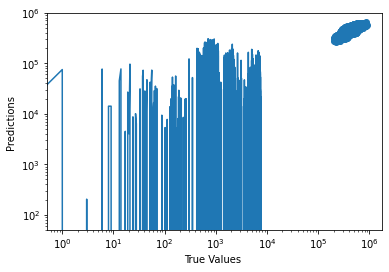

In [ ]:
# We will visualise the prediction vs the actual price from 2016 to 2021. But it will not be in the form predicted vs actual value. Rather, the graph plotted will 
# be the difference between the predicted and actual values. Note that the x axis will range from 0 to 7000+. This refers to the number of rows in the df from 2016
# onwards. We can check the number of rows using df[df['month'] >= month_to_label('2016-01')].

# How we can interpret the plot is as such : each highest/ lowest point correspond to the difference of the predicted and actual value of each row in the dataframe. 
# If the difference is more than 0, it means that the actual values are actually higher than the predicted values and vice versa. 
g = plt.plot(y_test - y_pred)



# OR if we really want to plot predicted vs actual, we can do this. But note that the scatter plot is quite messy 
g = plt.scatter(y_test, y_pred)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')


### Price visualization

In [ ]:
# Find rows with over 100 duplicates
test1 = df.drop(['month', 'resale_price'], 1)
test2 = test1.groupby(test1.columns.tolist(), as_index=False).size()
test2[test2['size'] > 100]

,floor_area_sqm,lease_commence_date,Latitude,Longitude,mrt_station,bus_stop,hawker_centre,clinic,storey_simplified,town_JURONG EAST,...,street_name_JURONG WEST ST 71,street_name_JURONG WEST ST 72,street_name_JURONG WEST ST 73,street_name_JURONG WEST ST 74,street_name_JURONG WEST ST 75,street_name_JURONG WEST ST 81,street_name_JURONG WEST ST 91,street_name_JURONG WEST ST 92,street_name_JURONG WEST ST 93,size
41,64,1986,1.348550,103.723270,1,1,0,1,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102
98,67,1983,1.337033,103.743332,1,1,0,0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135
100,67,1983,1.337033,103.743332,1,1,0,0,8.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119
107,67,1983,1.343549,103.740119,0,1,1,1,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129
109,67,1983,1.343549,103.740119,0,1,1,1,8.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125
129,67,1983,1.348470,103.717830,1,1,1,1,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118
131,67,1983,1.348470,103.717830,1,1,1,1,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109
133,67,1983,1.348470,103.717830,1,1,1,1,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104
156,67,1985,1.348550,103.723270,1,1,0,1,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106
158,67,1985,1.348550,103.723270,1,1,0,1,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113


In [ ]:
# Get all rows from df which have the same values as a particular row (chosen manually)
# & (df['month'] > month_to_label("2015-12"))
# vis = df[(df['floor_area_sqm']==64) & (df['lease_commence_date']==1986) & (df['Latitude']==1.34855) & (df['storey_simplified']==2) & (df['flat_model_Simplified']==1)]

# Get row without size column
vis_data = test2.drop('size', 1)
vis_row = vis_data.iloc[41]

# Filter df with this row
# check if each cell in the row is equal to the corresponding cells in the dataframe (which produces an entire boolean matrix)
# and run .all() along the rows dimension
# so say row is floor area=64 lease commence date=1986
# data is
# 123 123
# 64 123
# 64 1986

# after the equality check it becomes
# false false
# true false
# true true

# after the .all(1)
# false
# false
# true

# then index df with this which returns the rows with all cells equal
vis = df[(df[vis_data.columns.tolist()]==vis_row).all(1)]
vis

,month,floor_area_sqm,lease_commence_date,resale_price,Latitude,Longitude,mrt_station,bus_stop,hawker_centre,clinic,...,street_name_JURONG WEST ST 65,street_name_JURONG WEST ST 71,street_name_JURONG WEST ST 72,street_name_JURONG WEST ST 73,street_name_JURONG WEST ST 74,street_name_JURONG WEST ST 75,street_name_JURONG WEST ST 81,street_name_JURONG WEST ST 91,street_name_JURONG WEST ST 92,street_name_JURONG WEST ST 93
22047,123,64,1986,117000.0,1.34855,103.72327,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22048,123,64,1986,128000.0,1.34855,103.72327,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22121,127,64,1986,115000.0,1.34855,103.72327,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22201,131,64,1986,115500.0,1.34855,103.72327,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22213,132,64,1986,117000.0,1.34855,103.72327,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24109,353,64,1986,223000.0,1.34855,103.72327,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24175,360,64,1986,222000.0,1.34855,103.72327,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24198,367,64,1986,240000.0,1.34855,103.72327,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24203,368,64,1986,240000.0,1.34855,103.72327,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


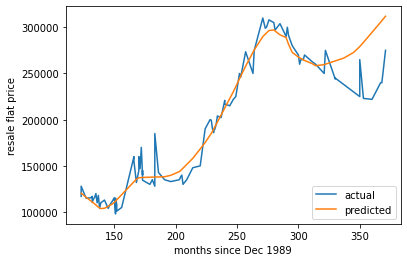

In [ ]:
# Plot the actual vs. predicted data
vis_month = vis['month']
vis_x = vis.drop('resale_price', axis=1)
vis_y = vis['resale_price']
plt.plot(vis_month, vis_y, vis_month, model.predict(vis_x))
plt.xlabel("months since Dec 1989")
plt.ylabel("resale flat price")
plt.legend(["actual", "predicted"], loc ="lower right")
plt.show()

In [ ]:
start_month = month_to_label('2021-04')
end_month = month_to_label('2025-04')
change_month = month_to_label('2023-04')
row = vis_row
change_features = ['mrt_station', 'bus_stop', 'hawker_centre', 'clinic']

months = pd.Series(range(start_month + 1, end_month + 1))
gen = pd.concat([row.to_frame().T] * months.size)
gen.reset_index(drop=True, inplace=True)
gen.insert(0, 'month', months)
gen[change_features] = 0
gen

,month,floor_area_sqm,lease_commence_date,Latitude,Longitude,mrt_station,bus_stop,hawker_centre,clinic,storey_simplified,...,street_name_JURONG WEST ST 65,street_name_JURONG WEST ST 71,street_name_JURONG WEST ST 72,street_name_JURONG WEST ST 73,street_name_JURONG WEST ST 74,street_name_JURONG WEST ST 75,street_name_JURONG WEST ST 81,street_name_JURONG WEST ST 91,street_name_JURONG WEST ST 92,street_name_JURONG WEST ST 93
0,377,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,378,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,379,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,380,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,381,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,382,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,383,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,384,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,385,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,386,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
change = gen.copy()
change.loc[change['month'] >= change_month, change_features] = 1
change

,month,floor_area_sqm,lease_commence_date,Latitude,Longitude,mrt_station,bus_stop,hawker_centre,clinic,storey_simplified,...,street_name_JURONG WEST ST 65,street_name_JURONG WEST ST 71,street_name_JURONG WEST ST 72,street_name_JURONG WEST ST 73,street_name_JURONG WEST ST 74,street_name_JURONG WEST ST 75,street_name_JURONG WEST ST 81,street_name_JURONG WEST ST 91,street_name_JURONG WEST ST 92,street_name_JURONG WEST ST 93
0,377,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,378,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,379,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,380,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,381,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,382,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,383,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,384,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,385,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,386,64.0,1986.0,1.34855,103.72327,0,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


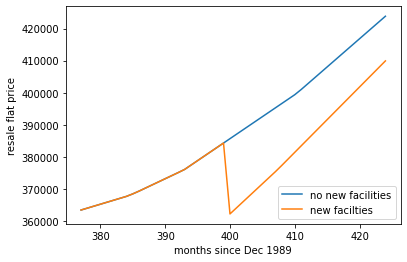

In [ ]:
plt.plot(gen['month'], model.predict(gen), change['month'], model.predict(change))
plt.xlabel("months since Dec 1989")
plt.ylabel("resale flat price")
plt.legend(["no new facilities", "new facilties"], loc="lower right")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dc6c878c-06f2-4ae3-b8a8-d910caf90233' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>